# Olimpiyatlar Veri Seti ile Veri Hazırlama

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veriyi İçeri Aktarma
veri= pd.read_csv("olimpiyatlar.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
def describe_function(df):
    print("Describe", df.describe().T)
    a= print("Null ?", df.isnull().values.any())

In [5]:
describe_function(veri)

Describe            count          mean           std     min      25%      50%  \
ID      271116.0  68248.954396  39022.286345     1.0  34643.0  68205.0   
Age     261642.0     25.556898      6.393561    10.0     21.0     24.0   
Height  210945.0    175.338970     10.518462   127.0    168.0    175.0   
Weight  208241.0     70.702393     14.348020    25.0     60.0     70.0   
Year    271116.0   1978.378480     29.877632  1896.0   1960.0   1988.0   

              75%       max  
ID      102097.25  135571.0  
Age         28.00      97.0  
Height     183.00     226.0  
Weight      79.00     214.0  
Year      2002.00    2016.0  
Null ? True


# Verilerin Temizlenmesi

1. Sütun isimlerinin düzenlenmesi
2. Yararsız verilerin çıkarılması ve düzenlenmesi
3. Kayıp veri sorunu

# Sütun İsimlerinin Düzenlenmesi

Bu bölümde veri içinde bulunan isimleri inceleyeceğiz ve bu isimleri Türkçeye çevireceğiz.

In [6]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
# sütun isimlerini değiştirme
veri.rename(columns={'ID'     : 'id',
                     'Name'   : 'isim',
                     'Sex'    : 'cinsiyet',
                     'Age'    : 'yas',
                     'Height' : 'boy',
                     'Weight' : 'kilo',
                     'Team'   : 'takim',
                     'NOC'    : 'uok',
                     'Games'  : 'oyunlar',
                     'Year'   : 'yil',
                     'Season' : 'sezon',
                     'City'   : 'sehir',
                     'Sport'  : 'spor',
                     'Event'  : 'etkinlik',
                     'Medal'  : 'madalya'}, inplace = True)
veri.head(3)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


# Yararsız Verilerin Çıkarılması ve Düzenlenmesi

In [8]:
#drop fonksiyonu ile id ve oyunlar sütunlarını çıkarma
veri = veri.drop(["id","oyunlar"],axis=1) #axis=1 ssütun anlamında
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Kayıp Veri Sorunu

Kayıp Veri: Veri içerisinde bulunan örneğin herhangi bir sütunda bulunan değerin olmaması anlamına gelir. NaN = Not a Number (veri bulunmama)

Kayıp veri ile mücadele etmek için,

Kayıp veriye ait örnekler veriden çıkarılabilir.
Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değeriyle doldurulabilir. Bu veri üzerinde çalışma yaparken:
Boy ve kilo sütunlarında bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.
Yaş sütununda bulunan kayıp veri setinin yaş ortalamasına göre dolduracağız.
Madalya alamayan sporcuları veri setinden çıkarcağız.

# Boy ve Kilo Sütunu Kayıp Veri Doldurma

In [9]:
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [10]:
#her bir etkinliği iteratif olarak dolaş
#etkinlik özelinde boy ve kilo rtalamalarını hesapla
#etkinlik özelinde kayıp boy ve kilo verilerini etkinlik ortalamalarına eşitle
veri_gecici = veri.copy() #gerçel veriyi bozmamak için bir kopyasını oluşturduk.
boy_kilo_liste = ["boy","kilo"]

for e in essiz_etkinlik: #liste içinde dolaş
    #etkinlik filtresi oluştur
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): # eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama yoksa rtalamayı hesapla
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    #etkinlik özelinde kayıp değerleri doldurulmuş olan veryi, veri_gecici'ye eşitleme
    veri_gecici[etkinlik_filtre]= veri_filtreli
    
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri= veri_gecici.copy()
veri.info() #boy ve kilo sütunlarında kayıp değer kaldı mı   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Yaş Sütunu Kayıp Veri Doldurma

In [11]:
#yaş değişkeninde tanımlı olmayan değerleri bul
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş ortalaması: {}".format(yas_ortalamasi))
veri["yas"]= veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# Madalya Alamayan Sporcuları Veri Serinden Çıkar

In [12]:
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [13]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri = veri[madalya_degiskeni_filtresi]

In [14]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [15]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [16]:
#Sonradan kullanabilmek için veriyi kaydedelim
veri.to_csv("olimpiyatlar_temizlenmiş.csv", index = False )

# Histogram Grafiği Çizdirme

In [17]:
#öncelikli olarak histogram grafikleini çizdireceğimiz fonksiyonu yazalım.
def plotHistogram(degisken):
    """
        Girdi: Değisken / sütun ismi
        Çıktı: İlgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(veri[degisken], bins=85, color = "grey")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

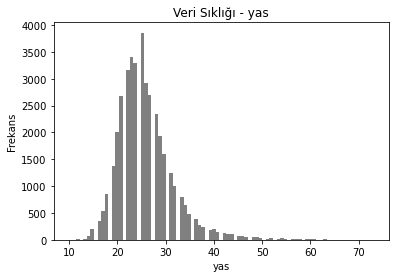

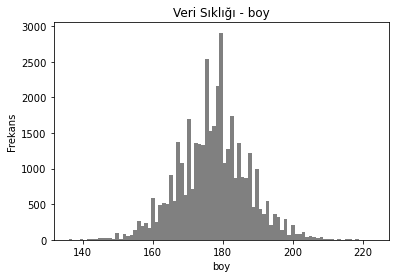

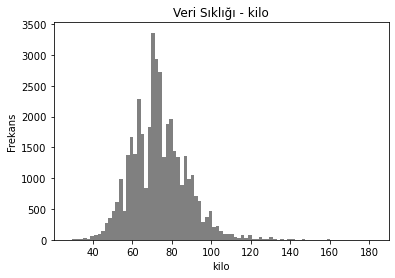

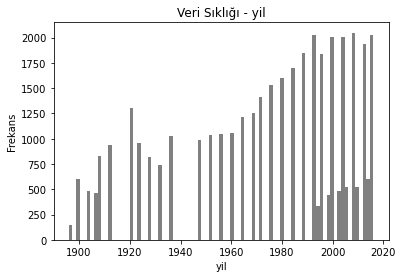

In [18]:
# tüm sayısal dğişkenler için histogramları çizdirelim
sayisal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayisal_degisken:
    plotHistogram(i)

# Bar Grafiği Çizdirme

Kategorik değişkenleri incelemek ve yorumlamak için bar grafiği kullanacağız.

In [19]:
#öncelikle çubuk garfiğini çizdireceğimiz metodu yazalım
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
               n= Gösterilecek eşsiz değer sayısı
        Çıktı: Çubuk Grafiği
    """
    veri_ =veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma , color= "pink")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))

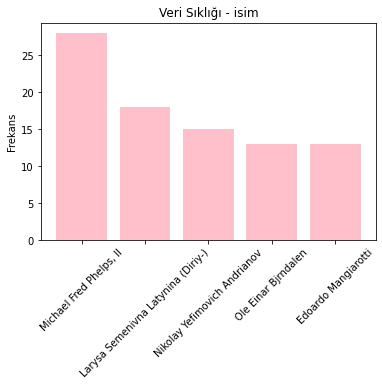

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


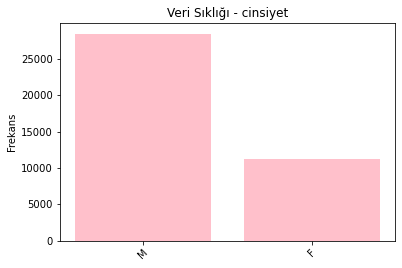

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


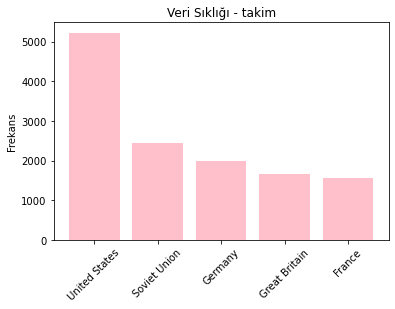

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


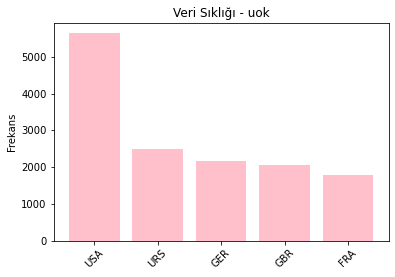

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


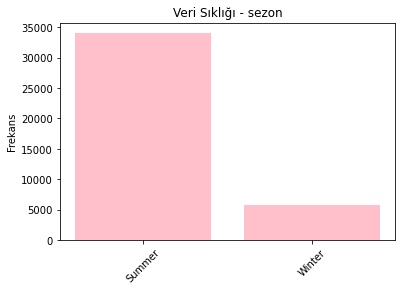

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


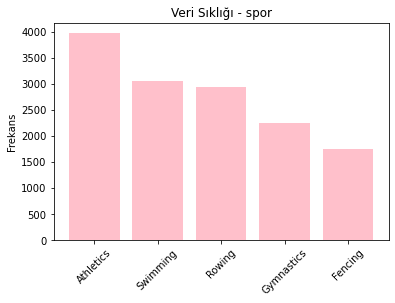

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


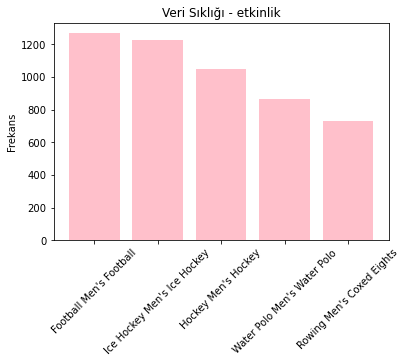

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


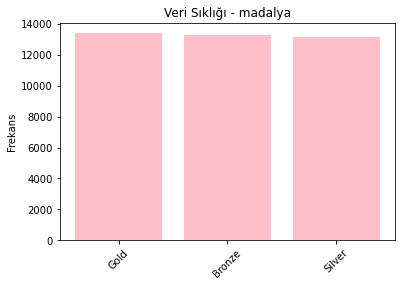

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [20]:
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "spor", "etkinlik", "madalya" ]
for i in kategorik_degisken:
    plotBar(i)

Cinsiyete Göre Boy ve Ağırlık Karşılaştırması

In [21]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [22]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


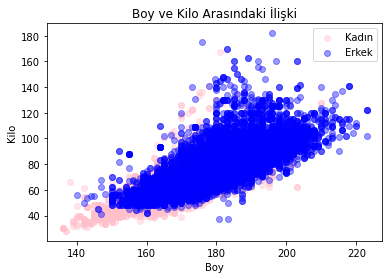

In [23]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha =0.4, label= "Kadın", color="pink")
plt.scatter(erkek.boy, erkek.kilo, alpha =0.4, label= "Erkek", color= "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

# Sayısal Sütunlar Arasında İlişki İncelemesi

In [24]:
veri.loc[:,["yas","boy","kilo","yil"]].corr() #korelasyon tablosu

,yas,boy,kilo,yil
yas,1.000000,0.061890,0.136349,-0.086898
boy,0.061890,1.000000,0.794368,0.047883
kilo,0.136349,0.794368,1.000000,-0.004888
yil,-0.086898,0.047883,-0.004888,1.000000


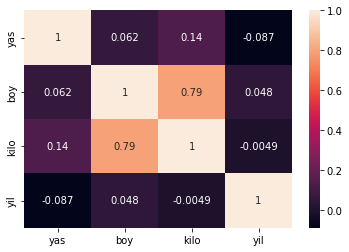

In [25]:
sns.heatmap(veri.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show() #korelasyon grafiği - heatmap

# Madalya ve Yaş Arasındaki İlişki


In [26]:
#sporcuları altın, gümüş ve bronz madalyaya göre ayıralım
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns = ['madalya'])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [27]:
veri_gecici.loc[:,["yas","madalya_Bronze", "madalya_Gold", "madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


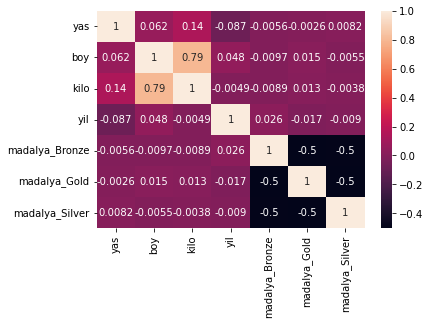

In [28]:
sns.heatmap(veri_gecici.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show() #korelasyon grafiği - heatmap

# Takımların Kazandıkları Altın,Gümüş ve Bronz Madalya Sayıları

In [29]:
veri_gecici.loc[:,["takim","madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["takim"],as_index= False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


# Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [30]:
veri_gecici.loc[:,["sehir","madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["sehir"],as_index= False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


# Cinsiyete Göre Kazanılan Altın, Gümüş, Bronz Madalya Sayıları

In [31]:
veri_gecici.loc[:,["cinsiyet","madalya_Bronze", "madalya_Gold", "madalya_Silver"]].groupby(["cinsiyet"],as_index= False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# ÇOK DEĞİŞKENLİ VERİ ANALİZİ

# Pivot Tablosu

In [32]:
veri_pivot = veri.pivot_table(index = "madalya", columns= "cinsiyet",
                             values= ["boy", "kilo", "yas"],
                             aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

# Boxplot Grafiği Çizdirme ve Aykırı Değerler

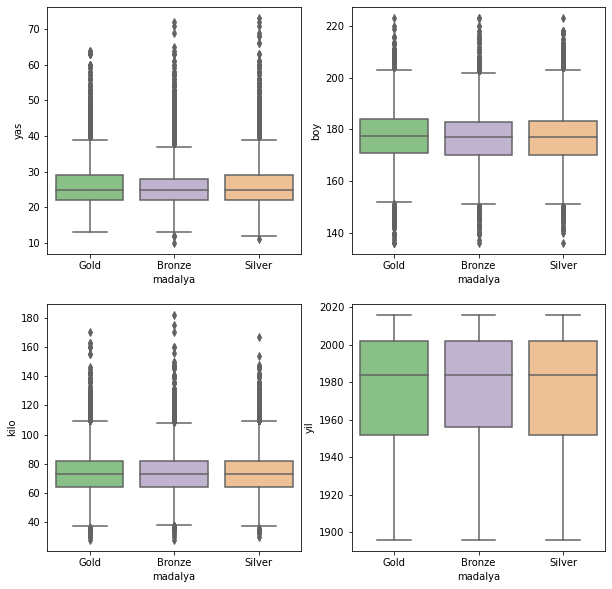

In [33]:
def graph(y):
    sns.boxplot(x="madalya", y=y, data=veri,
               palette="Accent")
  
plt.figure(figsize=(10,10))

plt.subplot(221)
graph('yas')

plt.subplot(222)
graph('boy')
  
plt.subplot(223)
graph('kilo')
  
plt.subplot(224)
graph('yil')
  
plt.show()

In [39]:
# Outlier Threshold'ların belirlenmesi:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    q1 = dataframe[col_name].quantile(q1)  # 1.Çeyrek
    q3 = dataframe[col_name].quantile(q3)  # 3.Çeyrek
    interquantile_range = q3 - q1  # range'i hesaplayalım
    low_limit = q1 - 1.5 * interquantile_range # low & up limit:
    up_limit = q3 + 1.5 * interquantile_range
    return low_limit, up_limit

In [40]:
outlier_thresholds(veri, "yas")

(-9.0, 63.0)

In [36]:
outlier_thresholds(veri, "kilo")

(-14.5, 165.5)

In [44]:
# Outlier Değer Var mı Yok Mu:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [42]:
check_outlier(veri,"yas")

True

In [43]:
check_outlier(veri,"kilo")

True

In [45]:
# Outlier Değerlere Erişmek:
def grab_outliers(dataframe, col_name, index=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].shape[0] > 10:
        print(dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].head())
    else:
        print(dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)])
    if index:
        outlier_index = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].index
        return outlier_index

In [46]:
grab_outliers(veri, "yas")

                                                 isim cinsiyet   yas     boy  \
44584   John (Herbert Crawford-) Copley (Williamson-)        M  73.0  175.34   
60009                                      Jozu Dupon        M  72.0  175.34   
60403                           Samuel Harding Duvall        M  68.0  169.33   
89338                         Letitia Marion Hamilton        F  69.0  174.00   
105199                                Charles Jacobus        M  64.0  175.34   

        kilo               takim  uok   yil   sezon      sehir  \
44584   70.7       Great Britain  GBR  1948  Summer     London   
60009   70.7             Belgium  BEL  1936  Summer     Berlin   
60403   70.7  Cincinnati Archers  USA  1904  Summer  St. Louis   
89338   80.0             Ireland  IRL  1948  Summer     London   
105199  70.7       United States  USA  1904  Summer  St. Louis   

                    spor                                       etkinlik  \
44584   Art Competitions  Art Competitions Mixe

In [47]:
grab_outliers(veri, "kilo")

                                 isim cinsiyet   yas    boy   kilo  \
39181      Andrey Ivanovich Chemerkin        M  24.0  183.0  170.0   
39182      Andrey Ivanovich Chemerkin        M  28.0  183.0  170.0   
124420         Olha Vasylivna Korobka        F  22.0  181.0  167.0   
173166         Dmitry Yuryevich Nosov        M  24.0  176.0  175.0   
237040  Christopher J. "Chris" Taylor        M  22.0  196.0  182.0   

                takim  uok   yil   sezon    sehir           spor  \
39181          Russia  RUS  1996  Summer  Atlanta  Weightlifting   
39182          Russia  RUS  2000  Summer   Sydney  Weightlifting   
124420        Ukraine  UKR  2008  Summer  Beijing  Weightlifting   
173166         Russia  RUS  2004  Summer   Athina           Judo   
237040  United States  USA  1972  Summer   Munich      Wrestling   

                                            etkinlik madalya  
39181          Weightlifting Men's Super-Heavyweight    Gold  
39182          Weightlifting Men's Super-Hea

# Outlier Değer Problemini Çözme

In [48]:
# Silme ile remove_outlierçözümleme:
def remove_outlier (dataframe, col_name, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [49]:
remove_outlier(veri, "yas")

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [50]:
def replace_with_thresholds(dataframe, variable, q1=0.01, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [51]:
replace_with_thresholds(veri, "kilo", q1=0.01, q3=0.95)

# Zaman Serilerinde Veri Analizi

In [ ]:
veri_zaman= veri.copy()
veri_zaman.head(3)

In [ ]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

In [ ]:
#olimpiyatların yapıldığı yılları sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

In [ ]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar çift yıllarda düzenlenir")
plt.show()


In [ ]:
#veri içerisinde bulunan yıl değerlerini datatime veri tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"], format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

In [ ]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

In [ ]:
#veri_zaman değişiminin ana indeksini, datetime tipi olan tarih_saaat değerine güncelleyelim
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"], axis=1, inplace = True)
veri_zaman

# Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [ ]:
periyodik_veri =veri_zaman.resample("2A").mean() #2 uıllık periyotlar halınde
periyodik_veri.head()

In [ ]:
#kayıp verileri çıkartalım
periyodik_veri.dropna(axis=0,inplace = True)
periyodik_veri.head()

In [ ]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllra göre ortalama yaş, boy ve ağırlık değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

# Yıllara Göre Madalya Sayıları

In [ ]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head(3)

In [ ]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri ==0).any(axis=1)]
periyodik_veri.tail()

In [ ]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

# Sezonlara Göre Madalya Sayıları

In [ ]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

In [ ]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

In [ ]:
periyodik_veri_yaz = kis.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

In [ ]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()


plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()